In [1]:
# detrend function
# for preprocessing cell
Order3Detrend <- function( eda ) {
    x <- seq(1, length(eda))
    x <- x/8
    df <- data.frame("t"=x, "eda"=eda)
    baseline <- lm(eda~t+I(t^2)+I(t^3), data=df)
    # return the detrended time course, but make it absolutely positive.
    if ( min(baseline$residuals) < 0 ) {
        r.o <- baseline$residuals + abs( min(baseline$residuals) )
    } else {
        r.o <- baseline$residuals
    }
    return( r.o )
}

In [4]:
# loading other support functions
source('fnirs_rfunctions.R')

# testing EDA preprocessing
# load random datasets for testing
data1 <- importData('../erik_fnirs_20200717/raw_data_erik/BN-9457/BN-9457_emo_fear_pre.txt') #fear
data2 <- importData('../erik_fnirs_20200717/raw_data_erik/BJ-4714/BJ-4714_stroop_post.txt') #stroop
data3 <- importData('../erik_fnirs_20200717/raw_data_erik/LA-8900/LA-8900_VFT_post.txt') #vft

Loading required package: signal

Attaching package: 'signal'

The following objects are masked from 'package:stats':

    filter, poly



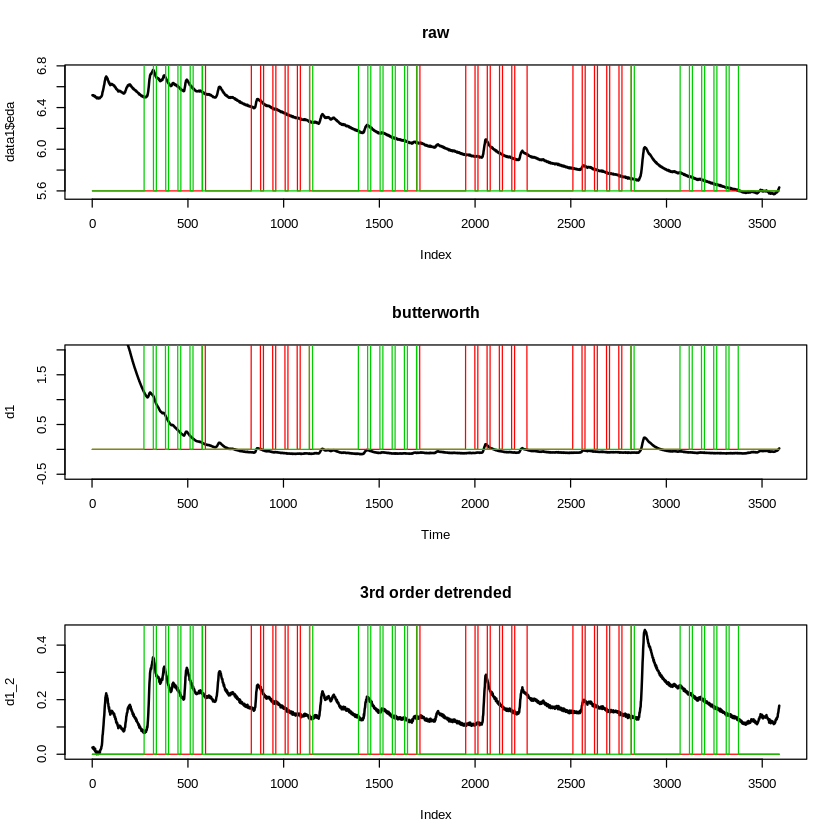

In [6]:
# taking a look at emo fear
par(mfrow=c(3,1))

plot(data1$eda, type='l', lwd=2, main="raw") 
lines(data1$glm1+5.6, col=2) 
lines(data1$glm2+5.6, col=3)

# butterworth highpass
require(signal)
bf <- butter(1, 0.0159/8, type="high")
d1 <- filter(bf, data1$eda)
plot(d1, type='l', ylim=c(-0.5,2), lwd=2, main="butterworth")
lines(data1$glm1, col=2) 
lines(data1$glm2, col=3)

# 3rd order detrending
d1_2 <- Order3Detrend(data1$eda)
plot(d1_2, type='l', lwd=2, main="3rd order detrended")
lines(data1$glm1, col=2) 
lines(data1$glm2, col=3)

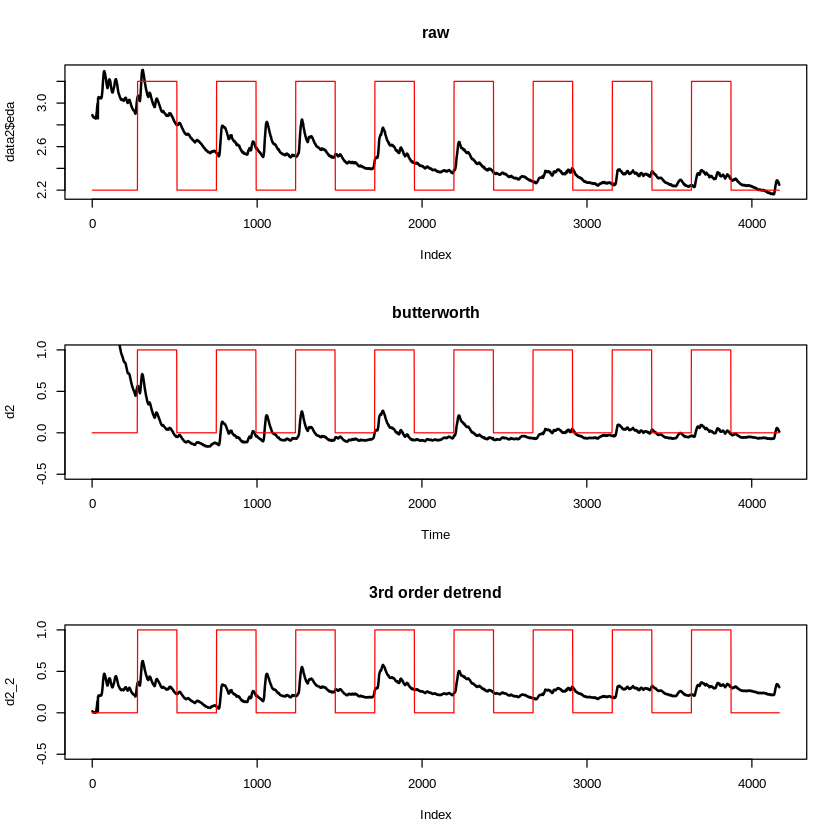

In [4]:
# run this on stroop and vft data
fixglm_stroop <- function ( raw_glm )
{
  N <- length( raw_glm );
  fixed_glm <- array(0, dim=N);
  for ( i in 1:N ) {
    if ( raw_glm[i] > 3) {
      fixed_glm[i] <- 1;
    } else {
      fixed_glm[i] <- 0;
    }
  }
  return ( fixed_glm ); 
}
par(mfrow=c(3,1))

plot(data2$eda, type='l', lwd=2, main="raw") 
offset <- 2.2
lines(fixglm_stroop_vft(data2$glm1+data2$glm2)+offset, col=2) 
# this is ok since we are going only after task - rest contrast in stroop's case

# butterworth highpass
bf <- butter(1, 0.0159/8, type="high")
d2 <- filter(bf, data2$eda)
plot(d2, type='l', lwd=2, ylim=c(-0.5,1), main="butterworth")
lines(fixglm_stroop_vft(data2$glm1+data2$glm2), col=2) 

# third order detrend
d2_2 <- Order3Detrend( data2$eda )
plot(d2_2, type='l', lwd=2, ylim=c(-0.5,1), main="3rd order detrend")
lines(fixglm_stroop_vft(data2$glm1+data2$glm2), col=2) 

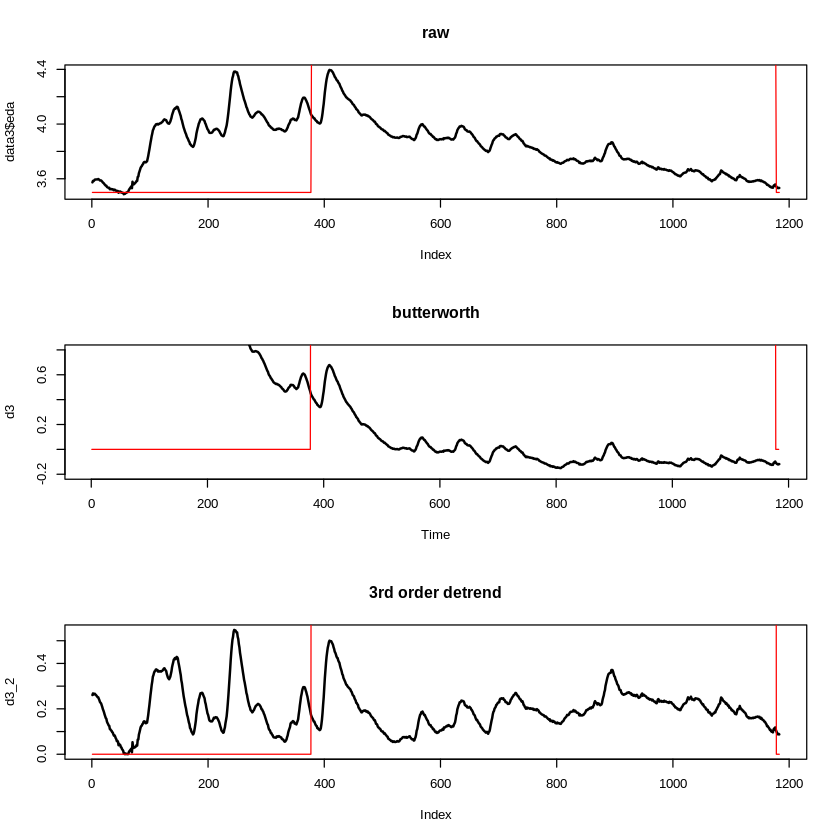

In [5]:
par(mfrow=c(3,1))

plot(data3$eda, lwd=2, type='l', main="raw") 
lines(fixglm_stroop_vft(data3$glm2)+3.5, col=2)

bf <- butter(1, 0.0159/8, type="high")
d3 <- filter(bf, data3$eda)
plot(d3, type='l', lwd=2, main="butterworth", ylim=c(-0.2,0.8))
lines(fixglm_stroop_vft(data3$glm2)*3, col=2)

d3_2 <- Order3Detrend( data3$eda )
plot(d3_2, type='l', lwd=2, main="3rd order detrend")
lines(fixglm_stroop_vft(data3$glm2)*3, col=2)